<a href="https://colab.research.google.com/github/alvincharles45/alvincharles45.github.io/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score
)
import matplotlib.pyplot as plt
import pickle

In [2]:

url_train = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv"
data = pd.read_csv(url_train, sep=",")

data.columns = data.columns.str.strip()

print("✅ Data loaded successfully.")
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())

✅ Data loaded successfully.
Shape: (37069, 20)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [3]:

label_enc = LabelEncoder()

for col in data.select_dtypes(include=["object"]).columns:
    if col != "y":
        data[col] = label_enc.fit_transform(data[col])

data["y"] = data["y"].map({"yes": 1, "no": 0})

X = data.drop("y", axis=1)
y = data["y"]

print("✅ Encoding complete.")
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

✅ Encoding complete.
Feature matrix shape: (37069, 19)
Target vector shape: (37069,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (29655, 19)
Testing size: (7414, 19)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pickle

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=25,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [6]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
print(f"✅ Cross-Validation Accuracy (mean of 5 folds): {cv_scores.mean():.4f}")

✅ Cross-Validation Accuracy (mean of 5 folds): 0.9005


In [7]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"✅ Test Accuracy: {acc:.4f}")
print(f"✅ ROC-AUC Score: {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 0.8987
✅ ROC-AUC Score: 0.8032

Confusion Matrix:
 [[6461  111]
 [ 640  202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6572
           1       0.65      0.24      0.35       842

    accuracy                           0.90      7414
   macro avg       0.78      0.61      0.65      7414
weighted avg       0.88      0.90      0.88      7414



In [8]:
with open("bank_rf_model.pkl", "wb") as f:
    pickle.dump(rf, f, protocol=5)
print("✅ Model saved as bank_rf_model.pkl")

✅ Model saved as bank_rf_model.pkl


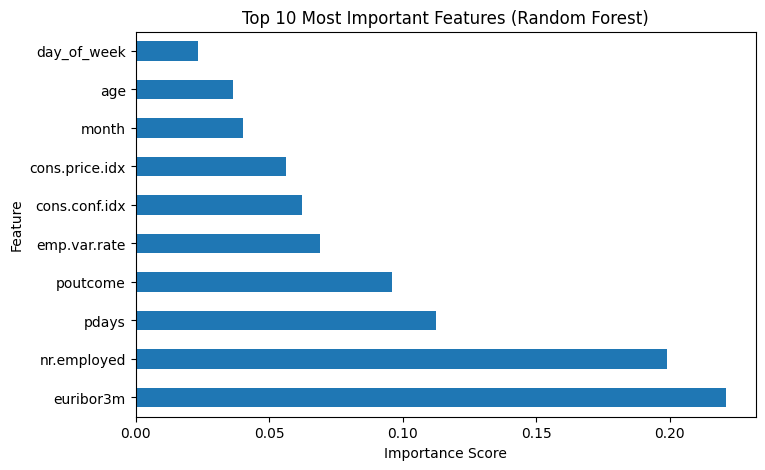

In [9]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [10]:
url_holdout = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv"
holdout = pd.read_csv(url_holdout, sep=",")

holdout.columns = holdout.columns.str.strip()

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for col in holdout.select_dtypes(include=["object"]).columns:
    holdout[col] = label_enc.fit_transform(holdout[col])

preds = rf.predict(holdout)

output = pd.DataFrame({"predictions": preds})
output.to_csv("predictions.csv", index=False)

print(f"✅ predictions.csv created with {len(output)} rows.")
display(output.head())


✅ predictions.csv created with 4119 rows.


,predictions
0,0
1,0
2,1
3,0
4,0


In [11]:
marital_day = data.groupby(["marital", "day_of_week"])["y"].mean().sort_values(ascending=False)
print(marital_day)

job_response = data.groupby("job")["y"].mean().sort_values(ascending=False)
print(job_response)


marital  day_of_week
3        4              0.181818
         0              0.166667
         2              0.166667
2        2              0.153208
         3              0.148560
         0              0.146217
         4              0.137181
         1              0.117874
3        1              0.117647
0        3              0.112529
1        2              0.112267
0        4              0.111940
1        4              0.109325
         3              0.105073
0        2              0.105006
         1              0.102593
         0              0.098425
1        0              0.093823
         1              0.090540
3        3              0.000000
Name: y, dtype: float64
job
8     0.313997
5     0.252282
10    0.146769
0     0.131277
11    0.119048
4     0.114426
9     0.108638
6     0.107535
3     0.099792
2     0.086391
7     0.082582
1     0.068195
Name: y, dtype: float64


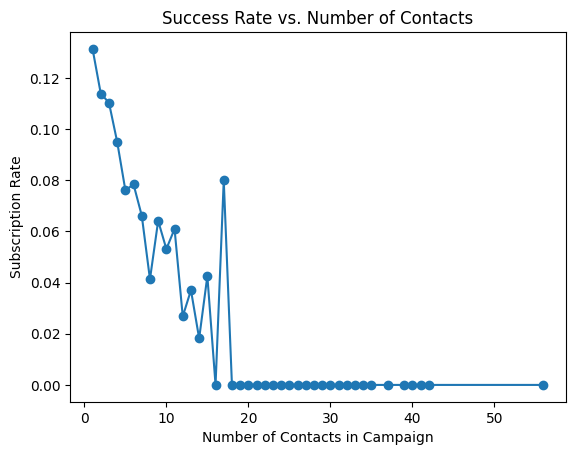

In [12]:
import matplotlib.pyplot as plt

campaign_effect = data.groupby("campaign")["y"].mean()
campaign_effect.plot(kind="line", marker="o", title="Success Rate vs. Number of Contacts")
plt.xlabel("Number of Contacts in Campaign")
plt.ylabel("Subscription Rate")
plt.show()


/tmp/ipython-input-2049381768.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_response.index, y=marital_response.values, palette="crest")
/tmp/ipython-input-2049381768.py:30: UserWarning: Glyph 128141 (\N{RING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128141 (\N{RING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


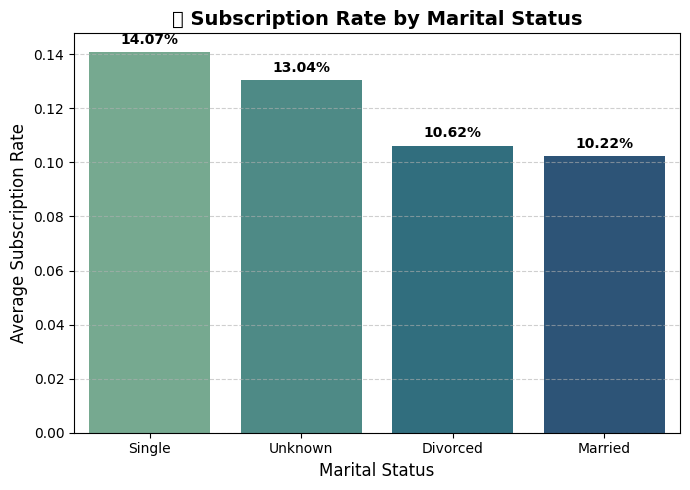

marital
Single      0.140730
Unknown     0.130435
Divorced    0.106193
Married     0.102200
Name: y, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

marital_response = data.groupby("marital")["y"].mean().sort_values(ascending=False)

marital_map = {
    0: "Divorced",
    1: "Married",
    2: "Single",
    3: "Unknown"
}
marital_response.index = marital_response.index.map(marital_map)

plt.figure(figsize=(7,5))
sns.barplot(x=marital_response.index, y=marital_response.values, palette="crest")

plt.title("💍 Subscription Rate by Marital Status", fontsize=14, weight='bold')
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Average Subscription Rate", fontsize=12)

for i, val in enumerate(marital_response.values):
    plt.text(i, val + 0.002, f"{val*100:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

print(marital_response)



/tmp/ipython-input-2196252494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=single_day_response.index, y=single_day_response.values, palette="mako")
/tmp/ipython-input-2196252494.py:28: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


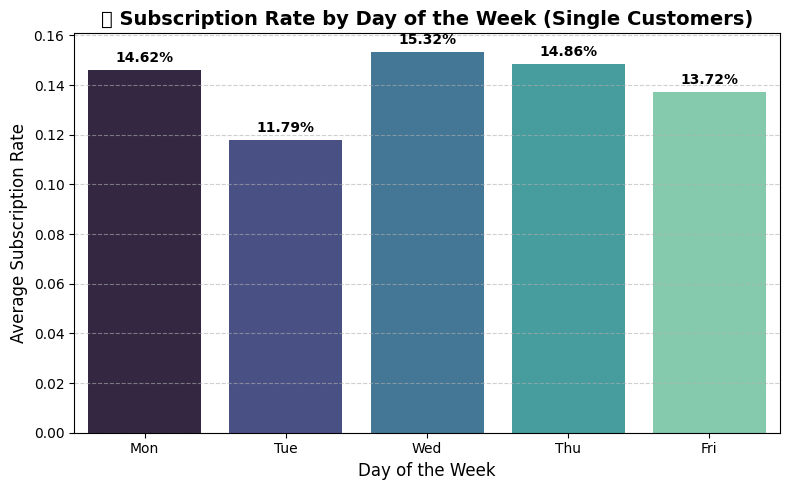

day_of_week
Mon    0.146217
Tue    0.117874
Wed    0.153208
Thu    0.148560
Fri    0.137181
Name: y, dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

single_data = data[data["marital"] == 2]

single_day_response = single_data.groupby("day_of_week")["y"].mean().sort_index()

day_labels = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri"}
single_day_response.index = single_day_response.index.map(day_labels)

plt.figure(figsize=(8,5))
sns.barplot(x=single_day_response.index, y=single_day_response.values, palette="mako")

plt.title("📅 Subscription Rate by Day of the Week (Single Customers)", fontsize=14, weight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Subscription Rate", fontsize=12)

for i, val in enumerate(single_day_response.values):
    plt.text(i, val + 0.002, f"{val*100:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

print(single_day_response)


In [22]:
# Check which day_of_week values exist and how many records for each
day_counts = data["day_of_week"].value_counts().sort_index()

# Optional: Map encoded values to weekday names
day_labels = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri"}
day_counts.index = day_counts.index.map(day_labels)

# Print the result
print("📅 Number of records per day of the week:")
print(day_counts)

# Also show how many unique days exist in total
print("\nUnique days present in dataset:", data["day_of_week"].unique())


📅 Number of records per day of the week:
day_of_week
Mon    7036
Tue    7657
Wed    7742
Thu    7287
Fri    7347
Name: count, dtype: int64

Unique days present in dataset: [1 3 4 2 0]


/tmp/ipython-input-570481752.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_response.values, y=job_response.index, palette="crest")
/tmp/ipython-input-570481752.py:39: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


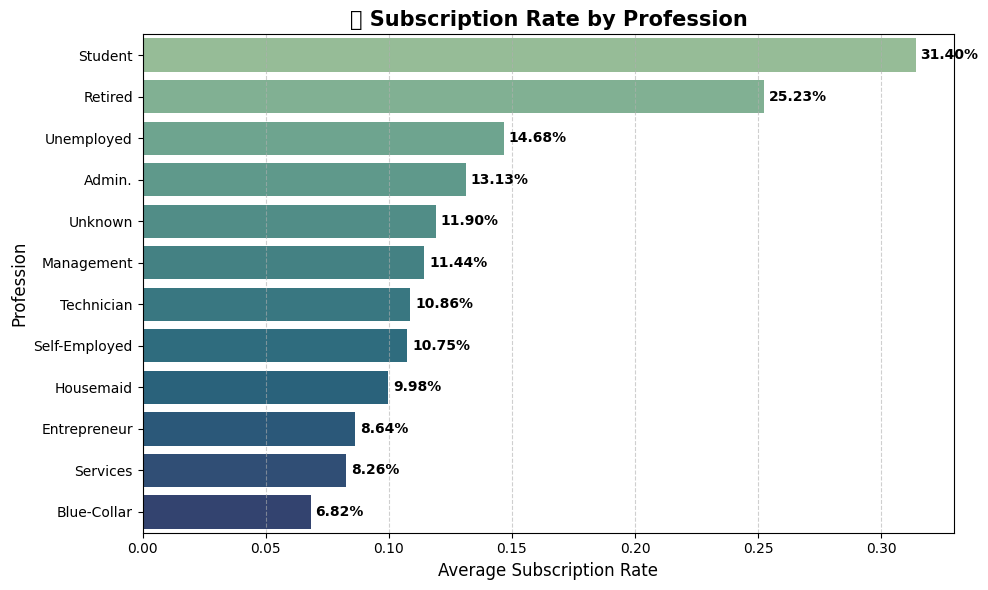

job
Student          0.313997
Retired          0.252282
Unemployed       0.146769
Admin.           0.131277
Unknown          0.119048
Management       0.114426
Technician       0.108638
Self-Employed    0.107535
Housemaid        0.099792
Entrepreneur     0.086391
Services         0.082582
Blue-Collar      0.068195
Name: y, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average subscription rate by job type
job_response = data.groupby("job")["y"].mean().sort_values(ascending=False)

# Optional: map encoded job numbers to readable labels
# (Adjust this mapping if your label encoder assigned different values)
job_map = {
    0: "Admin.",
    1: "Blue-Collar",
    2: "Entrepreneur",
    3: "Housemaid",
    4: "Management",
    5: "Retired",
    6: "Self-Employed",
    7: "Services",
    8: "Student",
    9: "Technician",
    10: "Unemployed",
    11: "Unknown"
}
job_response.index = job_response.index.map(job_map)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_response.values, y=job_response.index, palette="crest")

# Add titles and labels
plt.title("💼 Subscription Rate by Profession", fontsize=15, weight='bold')
plt.xlabel("Average Subscription Rate", fontsize=12)
plt.ylabel("Profession", fontsize=12)

# Annotate bars with percentages
for i, val in enumerate(job_response.values):
    plt.text(val + 0.002, i, f"{val*100:.2f}%", va='center', fontsize=10, weight='bold')

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Print the underlying data
print(job_response)


/tmp/ipython-input-4051878152.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=student_day_response.index, y=student_day_response.values, palette="viridis")
/tmp/ipython-input-4051878152.py:28: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


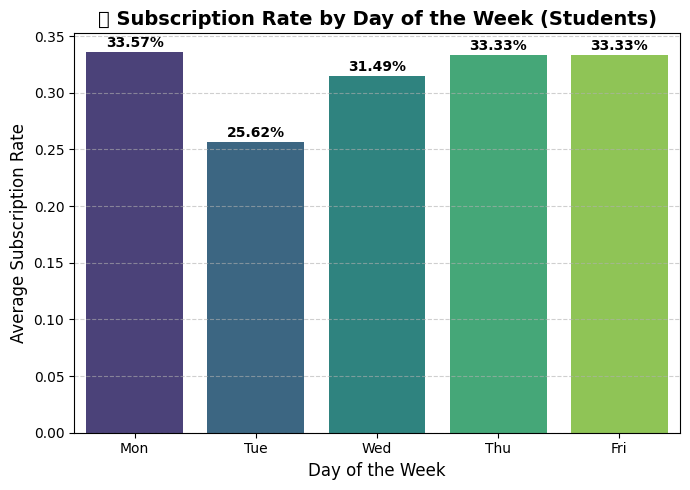

Average subscription rate by day (students only):
day_of_week
Mon    0.335664
Tue    0.256250
Wed    0.314917
Thu    0.333333
Fri    0.333333
Name: y, dtype: float64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for only students
students = data[data["job"] == 8]   # 8 = 'student' (based on our earlier mapping)

# Compute average subscription rate by day of the week
student_day_response = students.groupby("day_of_week")["y"].mean().sort_index()

# Map encoded day values to readable weekday names
day_labels = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri"}
student_day_response.index = student_day_response.index.map(day_labels)

# Create bar chart
plt.figure(figsize=(7,5))
sns.barplot(x=student_day_response.index, y=student_day_response.values, palette="viridis")

# Add title and labels
plt.title("🎓 Subscription Rate by Day of the Week (Students)", fontsize=14, weight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Subscription Rate", fontsize=12)

# Annotate bars with percentages
for i, val in enumerate(student_day_response.values):
    plt.text(i, val + 0.002, f"{val*100:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Print the calculated values
print("Average subscription rate by day (students only):")
print(student_day_response)


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- STEP 1: Load holdout dataset ---
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv", sep=",")

# Clean column names (to match training dataset)
test.columns = test.columns.str.strip()

print("✅ Holdout data loaded successfully.")
print("Shape:", test.shape)
print("Columns:", test.columns.tolist())

# --- STEP 2: Apply same label encoding as the training data ---
label_enc = LabelEncoder()

for col in test.select_dtypes(include=["object"]).columns:
    test[col] = label_enc.fit_transform(test[col])

print("✅ Encoding complete on test data.")

# --- STEP 3: Make predictions ---
predictions = rf.predict(test)

# --- STEP 4: Export predictions to CSV ---
my_predictions = pd.DataFrame(predictions, columns=["predictions"])

# Name the file with your team number and module number
my_predictions.to_csv("team8-module2-predictions.csv", index=False)

print("✅ CSV file created successfully!")
print("File preview:")
print(my_predictions.head())

print("\nNumber of predictions:", len(my_predictions))


✅ Holdout data loaded successfully.
Shape: (4119, 19)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
✅ Encoding complete on test data.
✅ CSV file created successfully!
File preview:
   predictions
0            0
1            0
2            1
3            0
4            0

Number of predictions: 4119


In [ ]:

label_enc = LabelEncoder()

for col in data.select_dtypes(include=["object"]).columns:
    if col != "y":
        data[col] = label_enc.fit_transform(data[col])

data["y"] = data["y"].map({"yes": 1, "no": 0})

X = data.drop("y", axis=1)
y = data["y"]

print("✅ Encoding complete.")
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

In [17]:
import pandas as pd
preds = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
print(preds["y"].value_counts(normalize=True))


y
no     0.886482
yes    0.113518
Name: proportion, dtype: float64
